In [179]:
pip install big-O

In [180]:
!pip install pyfiglet


In [181]:
!pip install termcolor

In [182]:
from numpy import linalg
import sympy as sp
from sympy import *
from sympy import solve_linear_system , Integral , sqrt , init_printing  
from sympy.matrices import Matrix , eye, zeros , ones , diag, GramSchmidt , DotProduct
from sympy import Matrix, init_printing
import pyfiglet 
from termcolor import colored, cprint
import fractions, numpy as np
init_printing()
import random
import time
import matplotlib.pyplot as plt
from datetime import datetime

This bloc allow user to enter a personalized matrix or to demand a default matrix .


In [183]:

#User Matrix
def customized_matrix():
   n = int(input('\nGive the order of matrix : '))  #Matrix Dimension
   A=matrix(n)   # stores the elements into the matrix
   print('\nEnter the vector B : ')
   B = []
   for j in range(n):
    element = int(input('Enter value : '))
    B.append(element)
   display('\n B : \n',Matrix(B))
   return A,B 

   
#Function creates Matrix
def matrix(n):
    print("Enter the entries in a single line (separated by space): ")   
    # User input of entries in a 
    # single line separated by space
    entries = list(map(float, input().split()))
    # For printing the matrix
   
    matrix = np.array(entries).reshape(n, n)
    display(Matrix(matrix))
    return matrix

#Default Matrix    
def default_matrix():
   A = np.random.rand(5,5)  #Default 5*5 Matrix with a random elements 
   display('A',Matrix(A))
   B = np.random.rand(5, 1)   #Default 5*1 Vector with a random values
   display('B',Matrix(B))
   return A,B



Interface Utilisateur 

In [184]:
def main():
        
        print("\nWould you want to test me with : ")
        print("""
        1 : Customize Matrix 
        2 : Default Matrix
        0 : Exit"""
              )
        choice = input("\nEnter your choice : ")
         
        if choice == '1':
             A,B=customized_matrix()
             c=Conditionnement(A)
             print("\nMatrix condtionnement : ",c)
             QualityConditionnement(c)
             print("\n\n QR Decomposition using Schmidt Gram: ")
             Q, R=gramschmidt(A)
             display('Q',Matrix(Q))
             display('R',Matrix(R))
            
             x=solveSystem(Q,R,B);
             print("\n\n The solution  of AX=b : \n ")
             display('X',Matrix(x))
            
        elif choice == '2' :
              A,B=default_matrix()
              c=Conditionnement(A)
              print("\nMatrix condtionnement : ",c)
              QualityConditionnement(c)
              print("\n\n QR Decomposition using Schmidt Gram: ")
              Q, R=gramschmidt(A)
              display('Q',Matrix(Q))
              display('R',Matrix(R))
              x=solveSystem(Q,R,B);
              print("\n\n The solution  of AX=b : \n")
              display('X',Matrix(x))
                   
        elif choice == '0':
            print("\nThank You")
        else : 
             print("\nInvalid choice Please rerun the program") 
            
               


In [185]:
def Header():
   print (colored(pyfiglet.figlet_format('OMEGA-3 TEAM',font="standard"),'red'))
def footer():
  print (colored(pyfiglet.figlet_format('Feriel zarrouki Doniez Touil wala Hammemi',font="digital"),'green'))

Test et conditionnement 

In [186]:
#check Q.Qt =Identity
def check_QQT(Q):
  print ('Q^T*Q = ')
  print (np.dot(Q.transpose(), Q))

#check Q*R=A   
def check_QRDec(Q,R):  
  print ('\n Q*R = \n',np.dot(Q,R))

#Conditionnement Function  
def Conditionnement(A):
  norm_a=linalg.norm(A)  #calculate the norm of matrix A
  norm_a_inverse=linalg.norm(linalg.inv(A))  #calculate the norm of the inverse matrix of A
  return norm_a*norm_a_inverse; 
  
def QualityConditionnement(cond) :
  if limit(cond,cond,1) :
    print("Matrix was  stable ")
  else :
    print("Matrix was not stable ")  


La décomposition QR avec la méthode de Schmidt 

In [187]:
#QR_Decomposition_Using_Gram_Schmidt_Algorithm
def gramschmidt(A):
    """
    Applies the Gram-Schmidt method to A
    and returns Q and R, so Q*R = A.
    """
    """Orthogonalize a group of vectors stored  as coloumns in the matrix A"""
    # Q and R Matrixes Intialization with zeros default values
    R = np.zeros((A.shape[1], A.shape[1]))
    Q = np.zeros(A.shape) 
    for k in range(0, A.shape[1]): 
        R[k, k] = np.sqrt(np.dot(A[:, k], A[:, k]))
        # The orthogonalized result is found and stored in the ith column of Q.
        Q[:, k] = A[:, k]/R[k, k]
        for j in range(k+1, A.shape[1]): 
          # To orthogonalize the vector in column k with respect to the
          # previous vectors, subtract from it its projection onto
          # each of the previous vectors.
            R[k, j] = np.dot(Q[:, k], A[:, j])
            A[:, j] = A[:, j] - R[k, j]*Q[:, k]
    return Q,R

Solve Ax=B

In [188]:
def solveSystem(Q,R,B):
   y = np.dot(Q.T,B) # Let y=Q'.B using matrix multiplication 
   x = linalg.solve(R, y) # Solve Rx=y
   return x

Time QR Factorization complexity 

In [189]:
#Complexity
def complexity():
  print('\nThe program complexity :')
  print("\nThe algorithm is expensive.Each iteration step requires the computation of the QR factorization of a full n × n matrix, each single iteration step has a complexity O(n^3). \nEven if we assume that the number of steps is proportional to n we would get an O(n^4) complexity.")
  # Plot results
  print('\nThe plot underneath represents the graphic evolution of time complexity \n')
  ns = range(1, 100)
  ts = [(n*n*n) for n in ns]
  plt.plot(ns, ts, 'ob')

  ___  __  __ _____ ____    _        _____   _____ _____    _    __  __ 
 / _ \|  \/  | ____/ ___|  / \      |___ /  |_   _| ____|  / \  |  \/  |
| | | | |\/| |  _|| |  _  / _ \ _____ |_ \    | | |  _|   / _ \ | |\/| |
| |_| | |  | | |__| |_| |/ ___ \_____|__) |   | | | |___ / ___ \| |  | |
 \___/|_|  |_|_____\____/_/   \_\   |____/    |_| |_____/_/   \_\_|  |_|
                                                                        

+-+-+-+-+-+-+ +-+-+-+-+-+-+-+-+ +-+-+-+-+-+-+ +-+-+-+-+-+ +-+-+-+-+
|F|e|r|i|e|l| |z|a|r|r|o|u|k|i| |D|o|n|i|e|z| |T|o|u|i|l| |w|a|l|a|
+-+-+-+-+-+-+ +-+-+-+-+-+-+-+-+ +-+-+-+-+-+-+ +-+-+-+-+-+ +-+-+-+-+
+-+-+-+-+-+-+-+
|H|a|m|m|e|m|i|
+-+-+-+-+-+-+-+


Would you want to test me with : 

        1 : Customize Matrix 
        2 : Default Matrix
        0 : Exit

Enter your choice : 1

Give the order of matrix : 3
Enter the entries in a single line (separated by space): 
1 1 0 1 0 1 0 1 1


⎡1.0  1.0  0.0⎤
⎢             ⎥
⎢1.0  0.0  1.0⎥
⎢             ⎥
⎣0.0  1.0  1.0⎦


Enter the vector B : 
Enter value : 2
Enter value : 3
Enter value : 4


'\n B : \n'

⎡2⎤
⎢ ⎥
⎢3⎥
⎢ ⎥
⎣4⎦


Matrix condtionnement :  3.674234614174767
Matrix was  stable 


 QR Decomposition using Schmidt Gram: 


'Q'

⎡0.707106781186547  0.408248290463863   -0.577350269189626⎤
⎢                                                         ⎥
⎢0.707106781186547  -0.408248290463863  0.577350269189626 ⎥
⎢                                                         ⎥
⎣       0.0         0.816496580927726   0.577350269189626 ⎦

'R'

⎡1.4142135623731  0.707106781186547  0.707106781186547⎤
⎢                                                     ⎥
⎢      0.0        1.22474487139159   0.408248290463863⎥
⎢                                                     ⎥
⎣      0.0               0.0         1.15470053837925 ⎦



 The solution  of AX=b : 
 


'X'

⎡0.5⎤
⎢   ⎥
⎢1.5⎥
⎢   ⎥
⎣2.5⎦


The program complexity :

The algorithm is expensive.Each iteration step requires the computation of the QR factorization of a full n × n matrix, each single iteration step has a complexity O(n^3). 
Even if we assume that the number of steps is proportional to n we would get an O(n^4) complexity.

The plot underneath represents the graphic evolution of time complexity 


Time Execution :  0:00:47.191114


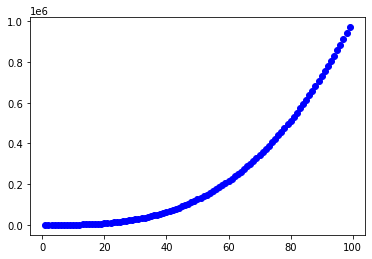

In [190]:

startTime = datetime.now()
Header()
footer()
main()
complexity()
print("\nTime Execution : ", datetime.now() - startTime)



